In [1]:
using Plots 
using Statistics

include("mcsolve_mps.jl")
include("trotter_functions.jl");

The Hamiltonian for the XXZ model is given by:
```math 
H = J \sum_{i=1}^{N} \left( S_i^x S_{i+1}^x + S_i^y S_{i+1}^y + \Delta S_i^z S_{i+1}^z \right)
```

We want to simulate the time evolution of the system under this Hamiltonian in presence of dissipation:
```math 
\frac{d\rho}{dt} = -i[H, \rho] + \sum_k \left( L_k \rho L_k^\dagger - \frac{1}{2} \{ L_k^\dagger L_k, \rho \} \right),
```
where $L_k = \sqrt{\gamma} \sigma_k^-$ are the collapse operators representing local spin relaxation with rate $\gamma$.

To do so, we will use the **quantum jumps** unravelling combined with **matrix product states (MPS)** to efficiently represent the state of the system.

The algorithm proceeds as follows:
1. Initialize the system in a given MPS state.
2. For each trajectory:
    - Evolve the state under the non-Hermitian effective Hamiltonian $H_{eff} = H - \frac{1}{2} \sum_k L_k^\dagger L_k$ using Trotter decomposition (Time-evolving block decimation).
    - At each time step, compute the probability of a quantum jump occurring. If a jump occurs, apply the corresponding collapse operator to the MPS and renormalize.
3. Repeat for a number of trajectories and average the results.

In [31]:
N = 20 #number of spins

n_traj = 100 #number of trajectories

t_list = 0:0.01:5.0 #time points
sites = siteinds("Qubit", N) #define sites

# function to create Trotter gates for non-Hermitian evolution
Δ = 0.5
gamma = 1.0
trotter_function = (s, tau, gamma) -> trotter_gates_second_order_xxz(s, tau, gamma, Δ)

#initial state
psi0 = productMPS(sites, vcat(["1"], ["0" for i in 1:N-1])) 


ee_array, z_array, bond_dimension_array = MC_MPS_evolution(
        sites, 
        trotter_function, 
        t_list, 
        psi0, 
        gamma; 
        seed=42, 
        n_traj=n_traj,
        save=false,
        Dmax=100     #maximum bond dimension
        );

Processing trajectory: 1
Processing trajectory: 2
Processing trajectory: 3
Processing trajectory: 4
Processing trajectory: 5
Processing trajectory: 6
Processing trajectory: 7
Processing trajectory: 8
Processing trajectory: 9
Processing trajectory: 10
Processing trajectory: 11
Processing trajectory: 12
Processing trajectory: 13
Processing trajectory: 14
Processing trajectory: 15
Processing trajectory: 16
Processing trajectory: 17
Processing trajectory: 18
Processing trajectory: 19
Processing trajectory: 20
Processing trajectory: 21
Processing trajectory: 22
Processing trajectory: 23
Processing trajectory: 24
Processing trajectory: 25
Processing trajectory: 26
Processing trajectory: 27
Processing trajectory: 28
Processing trajectory: 29
Processing trajectory: 30
Processing trajectory: 31
Processing trajectory: 32
Processing trajectory: 33
Processing trajectory: 34
Processing trajectory: 35
Processing trajectory: 36
Processing trajectory: 37
Processing trajectory: 38
Processing trajectory

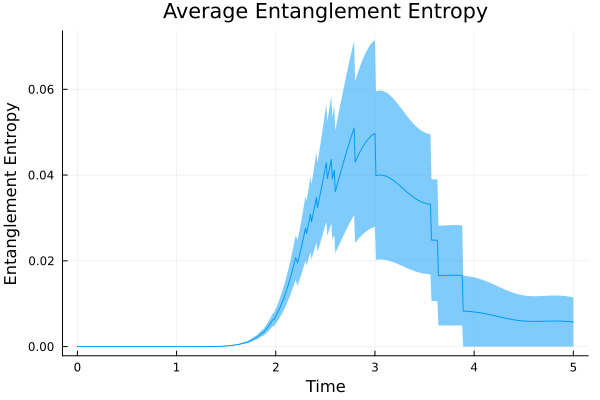

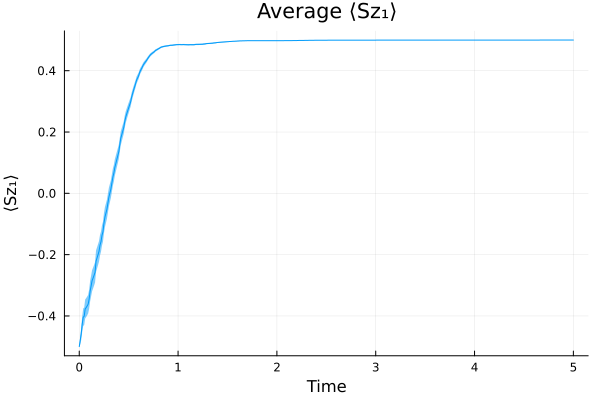

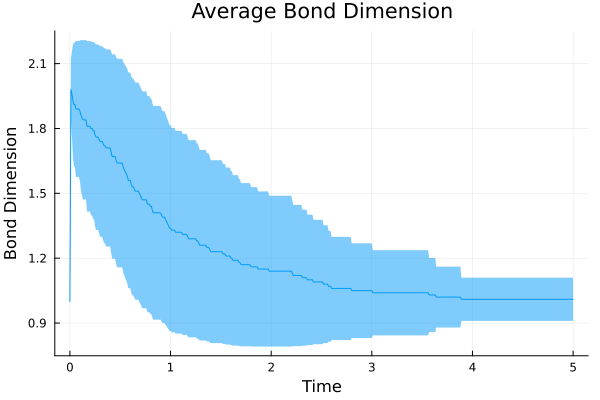

In [33]:
p1=plot(t_list, mean(ee_array, dims=1)[:] , ribbon=std(ee_array, dims=1)[:]/sqrt(n_traj), xlabel="Time", ylabel="Entanglement Entropy", title="Average Entanglement Entropy", legend=false)
display(p1)
p2=plot(t_list, mean(z_array, dims=1)[:], ribbon=std(z_array, dims=1)[:]/sqrt(n_traj), xlabel="Time", ylabel="⟨Sz₁⟩", title="Average ⟨Sz₁⟩", legend=false)
display(p2)
p3=plot(t_list, mean(bond_dimension_array, dims=1)[:], ribbon=std(bond_dimension_array, dims=1)[:], xlabel="Time", ylabel="Bond Dimension", title="Average Bond Dimension", legend=false)
display(p3)